# Segmentation using Spectral Clustering # 

In this notebook, we showcase a segmentation method based on spectral clustering. We introduce modified post-processing method based on 
[Stochastic ensemble consensus](https://uwaterloo.ca/vision-image-processing-lab/publications/sec-stochastic-ensemble-consensus-approach-unsupervised-sar)
and 
[Enabling scalable spectral clustering for image segmentation](https://www.sciencedirect.com/science/article/abs/pii/S0031320310003110).
Construction of the graph is based on [Normalized cuts and image segmentation](https://ieeexplore.ieee.org/abstract/document/868688?casa_token=GSpu1dgcN3UAAAAA:NSn5NK6LtNB2FfkVqG9d-EQf8C6iBzXlfIQaDtxcZW5O3mtmgXK6XR5ZmyGjBMkgngo1J_JwAA).

In [2]:
import skimage
import Spectral_Clustering
import numpy as np
import matplotlib.pyplot as plt
import utility_tools.Preprocessor as Preprocessor
import PostProcessor

In [3]:
# load image
img = skimage.io.imread('../data/spectral_data/plane.jpg').astype(np.float32)
img = img / 255

# down-scaling factor - to reduce the size of the image
k = 1/8

In [4]:
# downscale
imgDownScaled = Preprocessor.rescaleSkimage(img, k)

# segment the downscaled image using spectral clustering
labels = Spectral_Clustering.spectral_Segmentation(imgDownScaled, k=2, sigma_i=0.03, sigma_x=6, r=9, graphType='symmetric')

# rescale the labels to the original size using KNN 
labels = Preprocessor.rescaleCV2(labels.astype(np.float32), (img.shape[0], img.shape[1]))

In [5]:
# apply post processing - improve labels using Stochastic Ensemble Consensus
# parameters: image,
#             labels,
#             r - radius of the neighborhood for distance and influence calculation,
#             k - number of classes,
#             sigma - standard deviation of the influence function,
#             num_iteration - number of iterations,
#             expectation - if True, the expectation of the labels is returned, otherwise the labels themselves

new_labels = PostProcessor.Stochastic_Ensemble_Consensus(img, labels.copy(), r=14, k=2, sigma=0.06, num_iteration=10, expectation=True)

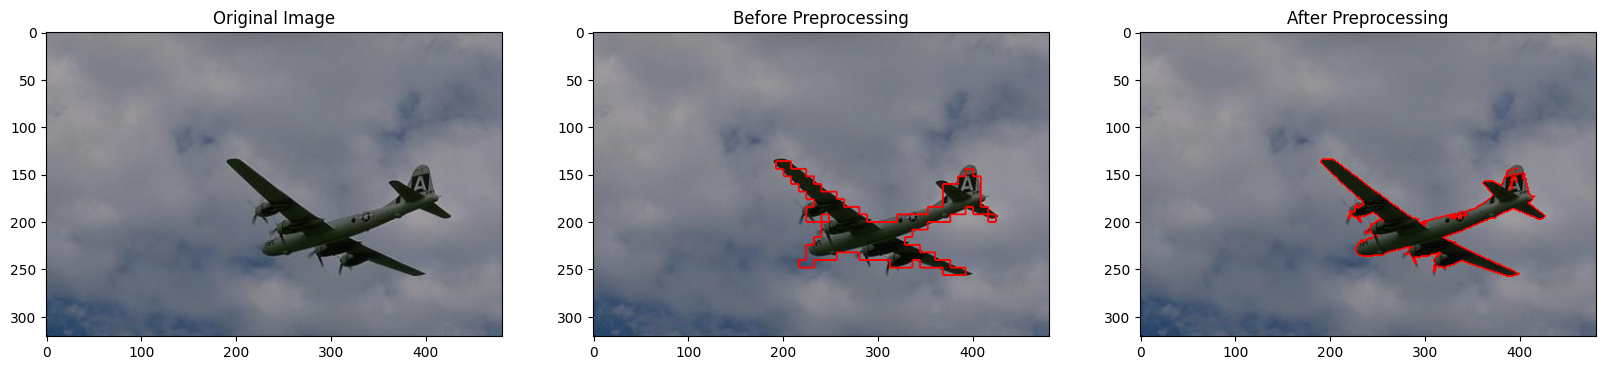

In [6]:
################ PLOT THE RESULTS ################### 
plt.rcParams['figure.figsize'] = [20, 25]
subplot, ax = plt.subplots(1, 3)

# original image
ax[0].imshow(img)   
ax[0].set_title('Original Image')

# before preprocessing
imgSegmented = img.copy()
boundry = skimage.segmentation.find_boundaries(labels, mode='thick')
imgSegmented[boundry, :] = [1, 0, 0]

ax[1].imshow(imgSegmented) 
ax[1].set_title('Before Preprocessing')

# after preprocessing
imgSegmented2 = img.copy()
boundry = skimage.segmentation.find_boundaries(new_labels, mode='thick')
imgSegmented2[boundry, :] = [1, 0, 0]

ax[2].imshow(imgSegmented2) 
ax[2].set_title('After Preprocessing')

plt.show()